# <center>All Life Credit Card Customer Segmentation</center>

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:Blue; border:0' role="tab" aria-controls="home"><center>Quick navigation</center></h3>

* [1. Introduction](#1)
* [2. Data Reading and Analysis](#2)
* [3. Data Exploration](#3) 
* [4. Model Training](#5) <br>

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:orange; border:0' role="tab" aria-controls="home"><center>Introduction</center><a id=1></a></h3>
    
    


All Life Bank wants to focus on its credit card customer base in the next 
financial year. They have been advised by their marketing research team, that the 
penetration in the market can be improved. Based on this input, the Marketing team 
proposes to run personalised campaigns to target new customers as well as upsell to 
existing customers. Another insight from the market research was that the customers 
perceive the support services of the back poorly. Based on this, the Operations team 
wants to upgrade the service delivery model, to ensure that customers queries are 
resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the 
Data Science team for help.


## Problem Statement
To identify different segments in the existing customer based on their 
spending patterns as well as past interaction with the bank. 

### Data Description
Data Description:
 Data is of various customers of a bank with their credit limit, the total number of credit 
cards the customer has, and different channels through which customer has 
contacted the bank for any queries, different channels include visiting the bank, 
online and through a call centre. 
### Key Questions:
1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendation's  to the bank on how to better market to and 
service these customers?


<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:orange; border:0' role="tab" aria-controls="home"><center>Data reading and Analysis</center><a id=2></a></h3>

In [1]:
# importing all important libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity


%matplotlib inline

In [2]:
# loading data
data = pd.read_csv("../input/credit-card/Credit Card Customer Data.csv")
data.head()

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  
0                  1                    1                 0  
1                  0                   10                 9  
2                  1                    3                 4  
3                  1                    1                 4  
4                  0                   12                 3

Checking for 'null' values

In [3]:
# now i'm going to drop serial number from data set 
data.drop('Sl_No',axis=1,inplace=True)

In [4]:
data.isnull().sum()

Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

There are no null values in the data.so i think it's good sign and let's move into further steps 


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer Key         660 non-null    int64
 1   Avg_Credit_Limit     660 non-null    int64
 2   Total_Credit_Cards   660 non-null    int64
 3   Total_visits_bank    660 non-null    int64
 4   Total_visits_online  660 non-null    int64
 5   Total_calls_made     660 non-null    int64
dtypes: int64(6)
memory usage: 31.1 KB


From here we can observe that every feature has contains integer values .

In [6]:
data.describe()

Customer Key  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
count    660.000000        660.000000          660.000000         660.000000   
mean   55141.443939      34574.242424            4.706061           2.403030   
std    25627.772200      37625.487804            2.167835           1.631813   
min    11265.000000       3000.000000            1.000000           0.000000   
25%    33825.250000      10000.000000            3.000000           1.000000   
50%    53874.500000      18000.000000            5.000000           2.000000   
75%    77202.500000      48000.000000            6.000000           4.000000   
max    99843.000000     200000.000000           10.000000           5.000000   

       Total_visits_online  Total_calls_made  
count           660.000000        660.000000  
mean              2.606061          3.583333  
std               2.935724          2.865317  
min               0.000000          0.000000  
25%               1.000000          1.000000  
50%               2.000000          3.000000  
75%               4.000000          5.000000  
max              15.000000         10.000000

### Observations :
 * From here we can observe that Maximum total_calls_made was 10 and minimum calls were 0 .
 * Minimum Online Total_visiters are 0 and Maximum online total visiters are 15.
 * Minimum average credit limit is 10000 and maximum average credit limit is 200000 .
 * Maximum total credit cards 10 and minimum total credit cards are 1 .

In [7]:
# last 5 rows from the data set 
data.tail()

Customer Key  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
655         51108             99000                  10                  1   
656         60732             84000                  10                  1   
657         53834            145000                   8                  1   
658         80655            172000                  10                  1   
659         80150            167000                   9                  0   

     Total_visits_online  Total_calls_made  
655                   10                 0  
656                   13                 2  
657                    9                 1  
658                   15                 0  
659                   12                 2

In [8]:
# let's check shape of the data set 
data.shape

(660, 6)

From here we can observe that 7 features are there and 660 rows present in this data set .

<AxesSubplot:>

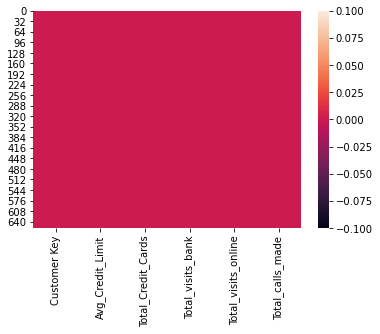

In [9]:
# let's check null values through heat map 
sns.heatmap(data.isnull())

Looking absolutely perfect 

### Remove columns where number of unique value is only 1.
Let's look at no of unique values for each column.We will remove all columns where number of unique value is only 1 because that will not make any sense in the analysis

In [10]:
unique = data.nunique()
unique = unique[unique.values == 1]

In [11]:
data.drop(labels = list(unique.index), axis =1, inplace=True)
print("So now we are left with",data.shape ,"rows & columns.")

So now we are left with (660, 6) rows & columns.


> My observation's here are there is no duplicate values.

In [12]:
data.describe().transpose()

count          mean           std      min       25%  \
Customer Key         660.0  55141.443939  25627.772200  11265.0  33825.25   
Avg_Credit_Limit     660.0  34574.242424  37625.487804   3000.0  10000.00   
Total_Credit_Cards   660.0      4.706061      2.167835      1.0      3.00   
Total_visits_bank    660.0      2.403030      1.631813      0.0      1.00   
Total_visits_online  660.0      2.606061      2.935724      0.0      1.00   
Total_calls_made     660.0      3.583333      2.865317      0.0      1.00   

                         50%      75%       max  
Customer Key         53874.5  77202.5   99843.0  
Avg_Credit_Limit     18000.0  48000.0  200000.0  
Total_Credit_Cards       5.0      6.0      10.0  
Total_visits_bank        2.0      4.0       5.0  
Total_visits_online      2.0      4.0      15.0  
Total_calls_made         3.0      5.0      10.0

In [13]:
df=data.copy()

In [14]:
#Deleting the duplicates entry  column
df = df.drop_duplicates(keep='first')
df.shape

(660, 6)

My Observation here is duplicate valules have been droped from the data set .
> And now 660 rows and 7 features available .

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:orange; border:0' role="tab" aria-controls="home"><center>Data Exploration</center><a id=3></a></h3>

In [15]:
#Printing the object datatypes and their unique values.

for column in df.columns:
    if df[column].dtypes == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print('**********************************************************************************************************')
        print('\n')

### Observation:

There is no other features contain any uniques values ,so it's not an problem and now i'm going to move into further steps .

#### Dealing with Outliers
By dropping outliers we can lose many rows as there are too many outliers in dataset. So making ranges to deal with extreme values.

In [16]:
data.head()

Customer Key  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0         87073            100000                   2                  1   
1         38414             50000                   3                  0   
2         17341             50000                   7                  1   
3         40496             30000                   5                  1   
4         47437            100000                   6                  0   

   Total_visits_online  Total_calls_made  
0                    1                 0  
1                   10                 9  
2                    3                 4  
3                    1                 4  
4                   12                 3

In [17]:
data['Avg_Credit_Limit'].min()

3000

In [18]:
data.columns=['Customer_Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

In [19]:
data.loc[data['Customer_Key']<=20000,'Customer_Key']=0 
data.loc[(data['Customer_Key']>20000)&(data['Customer_Key']<=40000),'Customer_Key']=1 
data.loc[(data['Customer_Key']>40000)&(data['Customer_Key']<=60000),'Customer_Key']=2 
data.loc[(data['Customer_Key']>60000)&(data['Customer_Key']<=80000),'Customer_Key']=3 
data.loc[(data['Customer_Key']>80000),'Customer_Key']=5

In [20]:
data['Avg_Credit_Limit'].min()

3000

In [21]:
data.loc[data['Avg_Credit_Limit']<=20000,'Avg_Credit_Limit']=0
data.loc[(data['Avg_Credit_Limit']>20000)&(data['Avg_Credit_Limit']<=40000),'Avg_Credit_Limit']=1
data.loc[(data['Avg_Credit_Limit']>40000)&(data['Avg_Credit_Limit']<=60000),'Avg_Credit_Limit']=2
data.loc[(data['Avg_Credit_Limit']>60000)&(data['Avg_Credit_Limit']<=80000),'Avg_Credit_Limit']=3
data.loc[(data['Avg_Credit_Limit']>80000)&(data['Avg_Credit_Limit']<=100000),'Avg_Credit_Limit']=4
data.loc[(data['Avg_Credit_Limit']>100000)&(data['Avg_Credit_Limit']<=120000),'Avg_Credit_Limit']=5
data.loc[(data['Avg_Credit_Limit']>120000)&(data['Avg_Credit_Limit']<=140000),'Avg_Credit_Limit']=6
data.loc[(data['Avg_Credit_Limit']>160000)&(data['Avg_Credit_Limit']<=180000),'Avg_Credit_Limit']=7

data.loc[(data['Avg_Credit_Limit']>180000),'Avg_Credit_Limit']=8

In [22]:
data.head()

Customer_Key  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0             5                 4                   2                  1   
1             1                 2                   3                  0   
2             0                 2                   7                  1   
3             2                 1                   5                  1   
4             2                 4                   6                  0   

   Total_visits_online  Total_calls_made  
0                    1                 0  
1                   10                 9  
2                    3                 4  
3                    1                 4  
4                   12                 3

Let's visualize how skewed our dataset is.

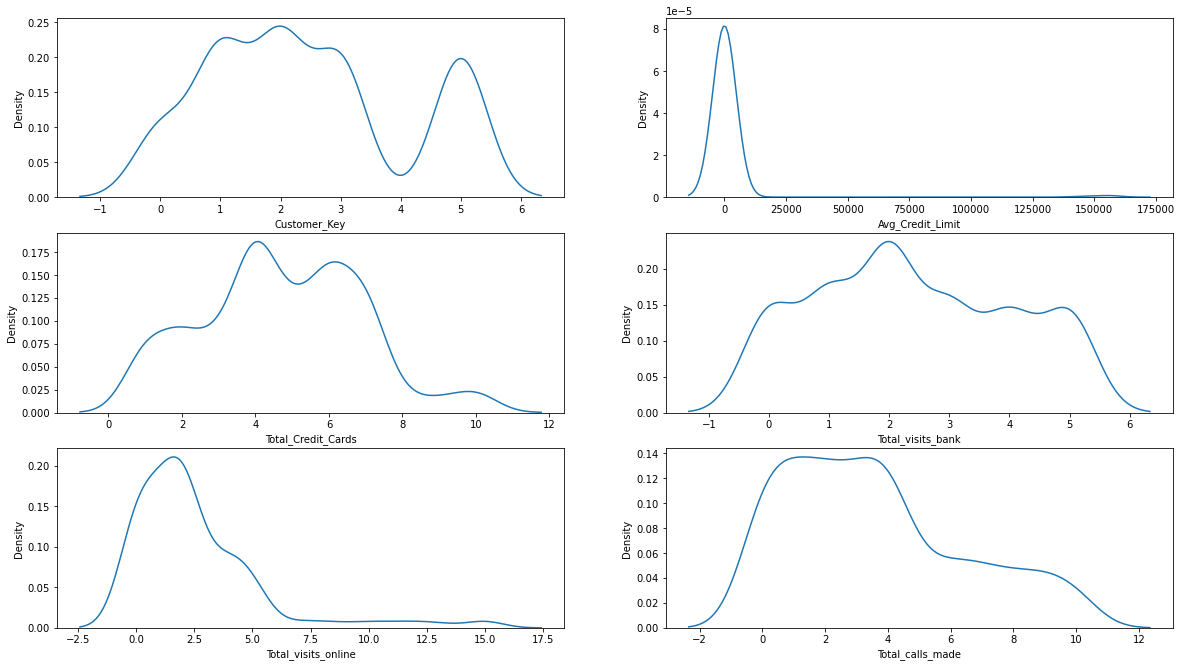

In [23]:
plt.figure(figsize=(20,35))
for i, col in enumerate(data.columns):
    if data[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(data[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

Woah!! There is a lot of skewness and they are varied. It is kind of expected from datasets like these as there will always be a few customers who do very high amount of transactions.

Now it depends on our application whether we want to handle the skewness in our dataset or not for a clustering problem. For instance if we want to do clustering for anamoly detection in that case we wouldn't want to handle the outliers as we would like our model to detect them and group them in a cluster. For our application I am looking for a good visualization so I would like to handle the skewness as much as possible as it will help the model to form better clusters.

Let's see if we can do something about this.

In [24]:
cols=['Customer_Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

In [25]:

X= np.asarray(data)

In [26]:
scale = StandardScaler()
X = scale.fit_transform(X)
X.shape

(660, 6)

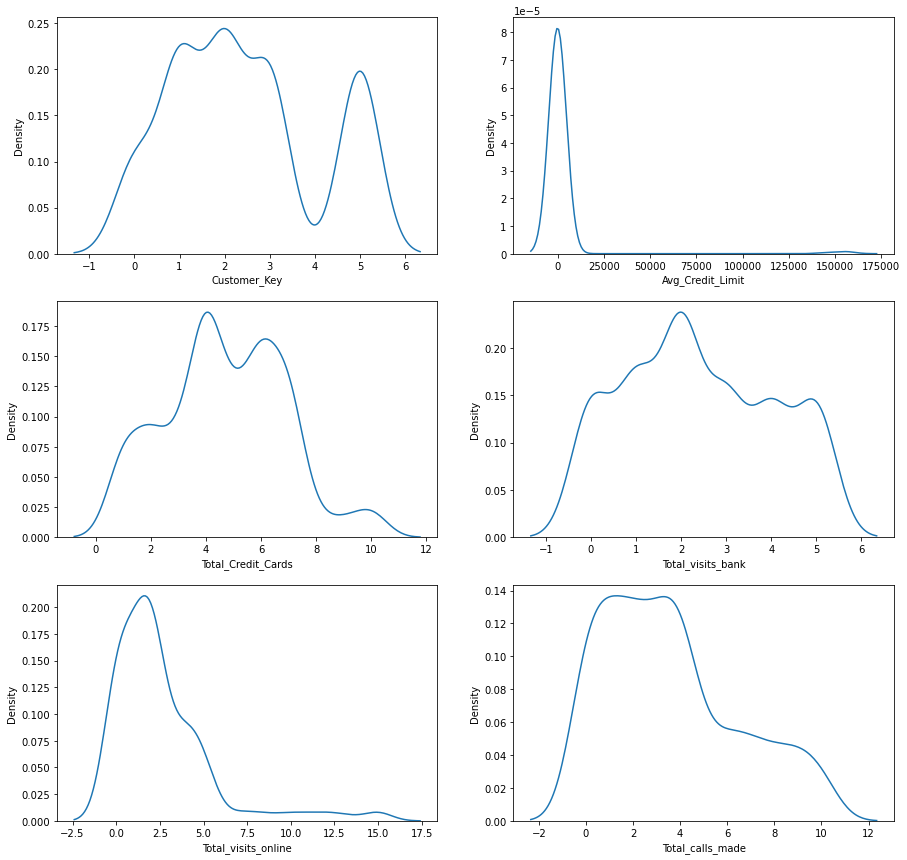

In [27]:
plt.figure(figsize=(15,20))
for i, col in enumerate(cols):
    ax = plt.subplot(4, 2, i+1)
    sns.kdeplot(data[col], ax=ax)
plt.show()

I know it may not look like an ideal distribution but it is better than what we had and it is our job as data scientist to help our model as much as possible.

Looking for some correlation now.

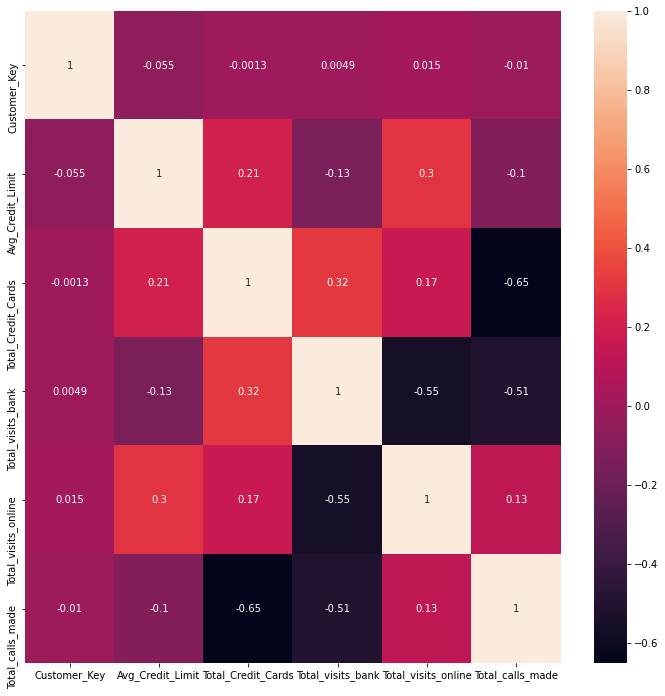

In [28]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True)
plt.show()

From here we can observe that most of the features are highly negatively cor-relate with most of the features .

There are many ways to handle this. We would go ahead with dimensionality reduction and we will bring our data down to lower dimension.

We will use PCA for our dimensionality reduction.

To explain briefly what PCA does under the hood is that it finds new dimension/axis for the dataset such that it explains maximum variance. That axis is then the first principal component. Then it chooses another component perpendicular to first principal component which explains maximum variance.



We will select the number of components such that our data in the lower dimensions explains 95% of variance of our original data.

In [29]:
#from sklearn.decomposition import PCA

#pca = PCA(n_components=0.95)
#X_red = pca.fit_transform(data)

With that we are ready to do what we have always wanted to do i.e Clustering. We will use Kmeans clustering algorithm to extraxts clusters of information from our dataset.

<a id="top"></a>

<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:orange; border:0' role="tab" aria-controls="home"><center>Model Training</center><a id=5></a></h3>

## Clustering using K-means

It is quite interesting and intuitive to know how KMeans clustering algorithm actually works.

KMeans clustering is an unsupervised clustering algorithm which groups together similar data in same cluster to form k clusters. As a result we get groups of similar records which can then be labelled and acted upon accordingly.

How does the algorithm find the clusters?

1. Given number of clusters k, it first selects k random point (may not be points in dataset) to be the k cluster centroids.
2. Then we assign each point to the closest centroid and form k clusters.
3. Once all points are assigned to a cluster, we then compute new centroids for each cluster.
4. Then we reassign points to the closest centroid.
5. If any reassignment takes place in step 4 we repeat steps 3 and 4. If no reassignment takes place then our model is ready and we have extracted k clusters from our dataset.

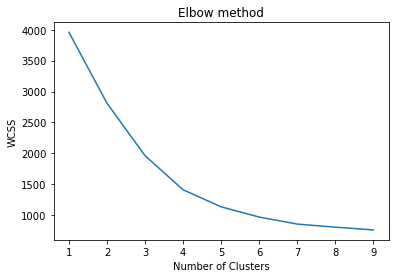

In [30]:
from sklearn.cluster import KMeans

kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(X) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

We will use silhouette score to see which one performs better.

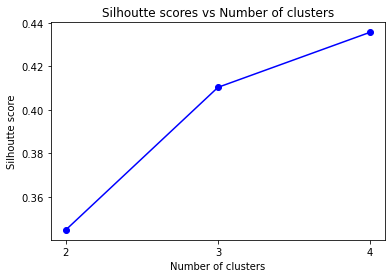

In [31]:
from sklearn.metrics import silhouette_score

silhoutte_scores = [silhouette_score(X, model.labels_) for model in kmeans_models[1:4]]
plt.plot(range(2,5), silhoutte_scores, "bo-")
plt.xticks([2, 3, 4])
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

Well, we were wrong n=4 seems to have higher silhouette than the other two. It is what it is, we will select 4 as our number of clusters.

### Model Evaluation and Inference.

### Silhouette Analysis
silhouette score=p−qmax(p,q)
 
* p  is the mean distance to the points in the nearest cluster that the data point is not a part of
* q  is the mean intra-cluster distance to all the points in its own cluster.
* The value of the silhouette score range lies between -1 to 1.
* A score closer to 1 indicates that the data point is very similar to other data points in the cluster,
* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [32]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(X)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.3447824662553384
For n_clusters=3, the silhouette score is 0.41029865067166593
For n_clusters=4, the silhouette score is 0.43561027962061283
For n_clusters=5, the silhouette score is 0.3370935573814992
For n_clusters=6, the silhouette score is 0.30351573247382824
For n_clusters=7, the silhouette score is 0.2930361187128097
For n_clusters=8, the silhouette score is 0.27441887484181937


### Observations :
* From here we can observe that for 4 clusters silhouette score is 0.43561
* And i think it's good comapre to all other clusters 

Assigning labels as cluster index to our dataset.

In [33]:
#making data frame
clusters=pd.concat([data, pd.DataFrame({'cluster_id':kmeans.labels_})], axis=1)
clusters.head()

Customer_Key  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0             5                 4                   2                  1   
1             1                 2                   3                  0   
2             0                 2                   7                  1   
3             2                 1                   5                  1   
4             2                 4                   6                  0   

   Total_visits_online  Total_calls_made  cluster_id  
0                    1                 0           6  
1                   10                 9           1  
2                    3                 4           4  
3                    1                 4           7  
4                   12                 3           2

<AxesSubplot:xlabel='cluster_id', ylabel='Total_visits_online'>

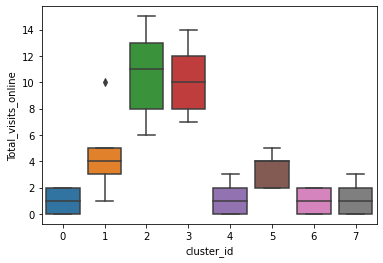

In [34]:
# Box plot to visualize Cluster Id vs Total_visits_online

sns.boxplot(x='cluster_id', y='Total_visits_online', data=clusters)

<AxesSubplot:xlabel='cluster_id', ylabel='Total_visits_bank'>

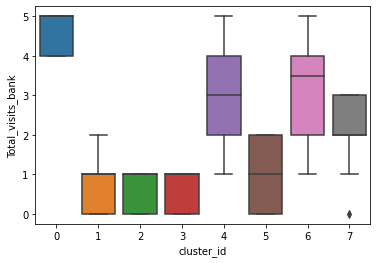

In [35]:
# Box plot to visualize Cluster Id vs Total_visits_online

sns.boxplot(x='cluster_id', y='Total_visits_bank', data=clusters)

<AxesSubplot:xlabel='cluster_id', ylabel='Total_calls_made'>

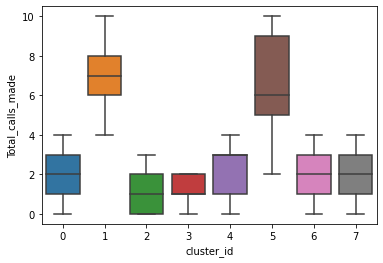

In [36]:
# Box plot to visualize Cluster Id vs Total_calls_made

sns.boxplot(x='cluster_id', y='Total_calls_made', data=clusters)

Inverse transforming the log transformation that we did earlier to visualize the results on original scale.

In [37]:
#for col in cols:
    #data[col] = np.exp(data[col])

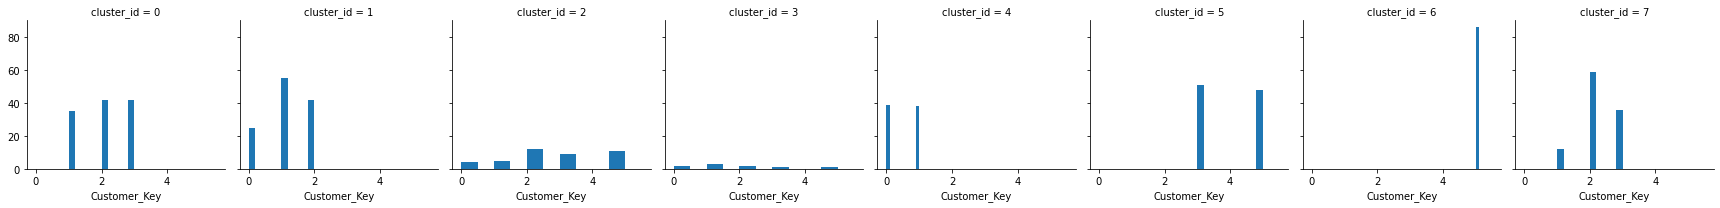

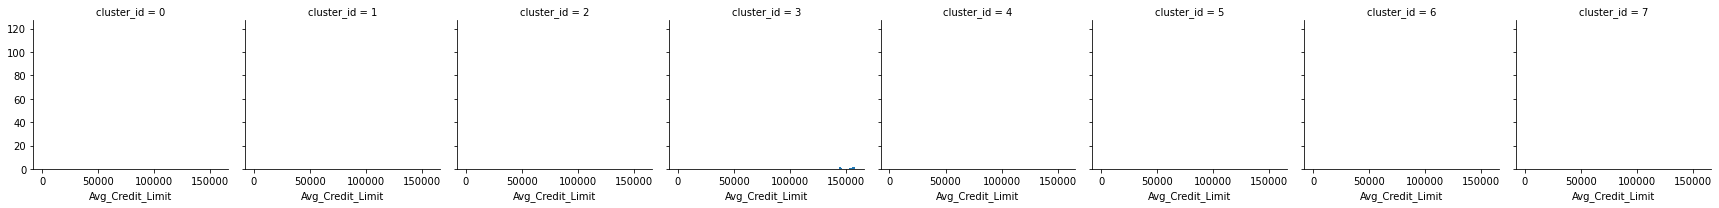

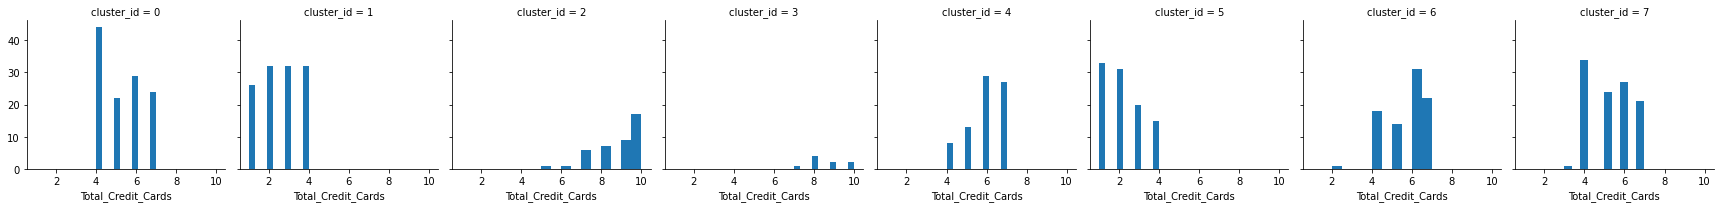

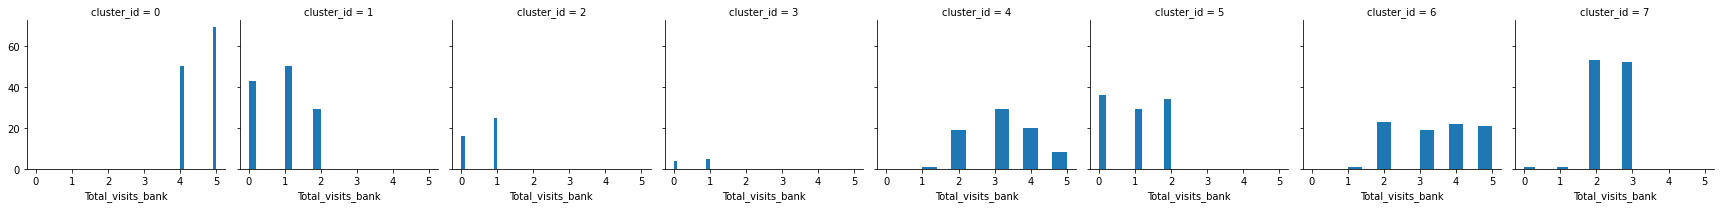

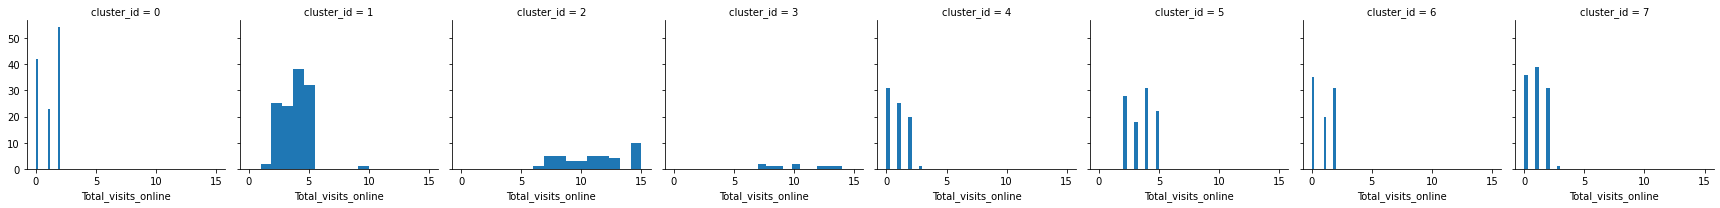

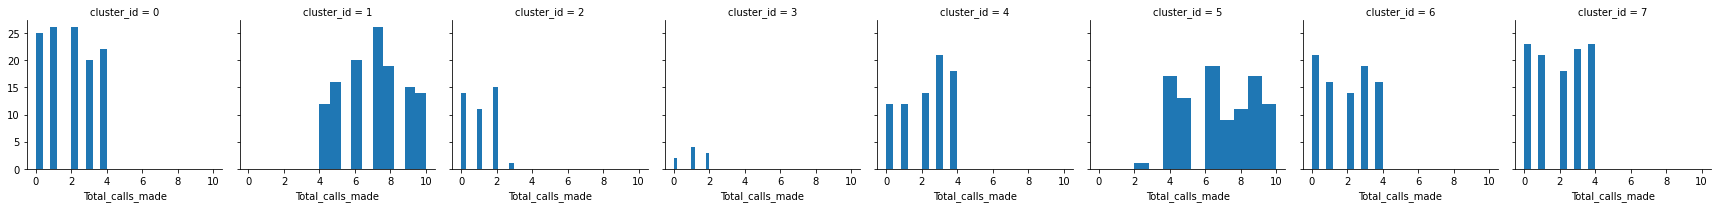

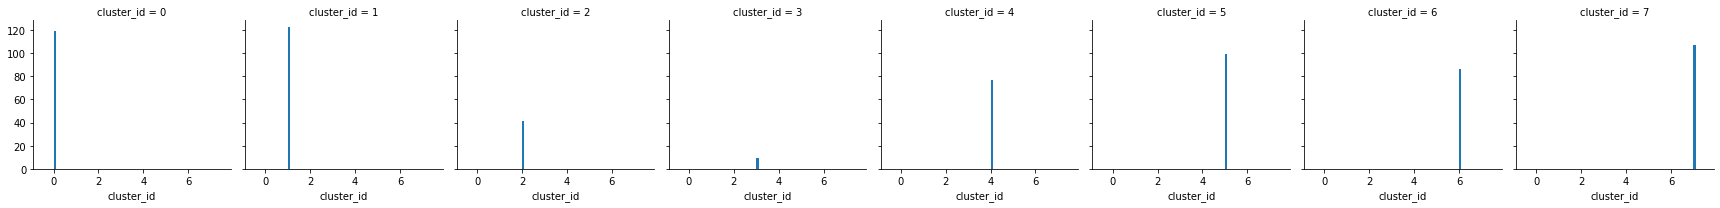

In [38]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster_id')
    grid.map(plt.hist, c)

In [39]:
dist = 1 - cosine_similarity(X)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(660, 2)

In [41]:
data.columns

Index(['Customer_Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

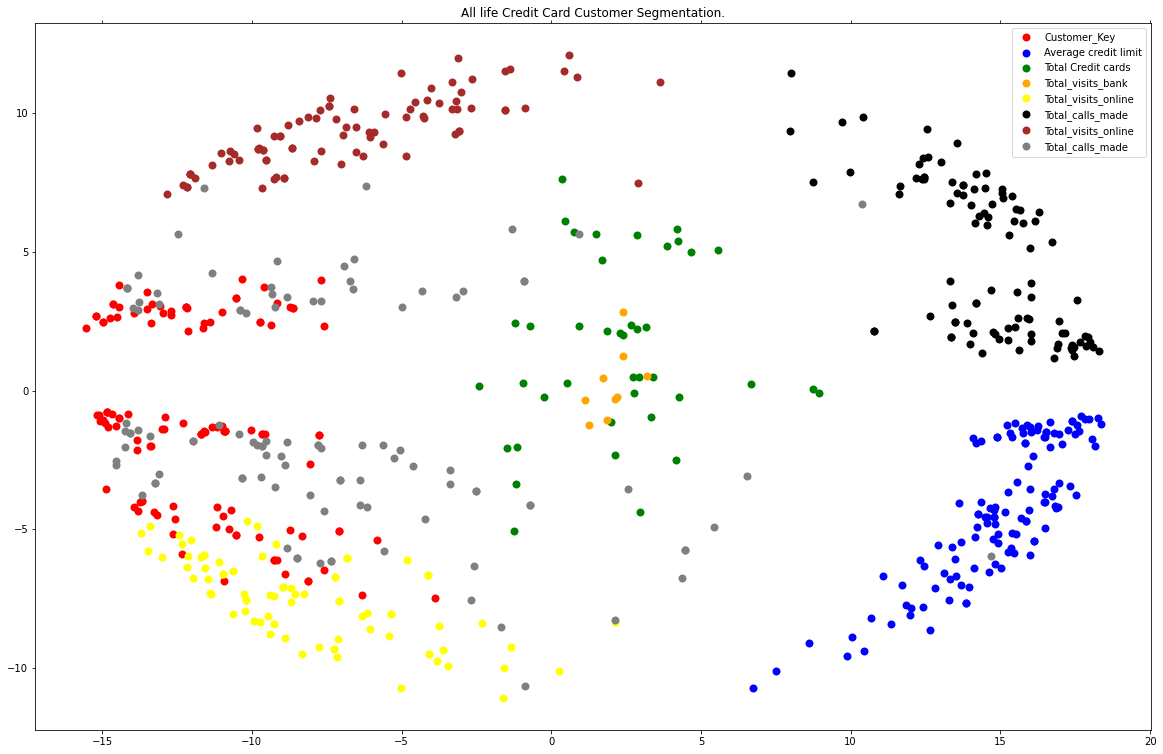

In [51]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green',
          3: 'orange',
          4: 'yellow',
          5: 'black',
          6: 'brown',
          7: 'gray'
         }

names = {0:'Customer_Key',
         1: 'Average credit limit', 
         2: 'Total Credit cards',
         3: 'Total_visits_bank',
         4: 'Total_visits_online',
         5:'Total_calls_made',
         6: 'Total_visits_online',
         7:'Total_calls_made',
         }
  
df = pd.DataFrame({'x': x, 'y':y, 'cluster_id':kmeans.labels_}) 
groups = df.groupby('cluster_id')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=8,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("All life Credit Card Customer Segmentation.")
plt.show()

## Hierarchical Clustering

Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy. There are two types of hierarchical clustering,

1. Divisive
2. Agglomerative.

In [52]:
# importing all important libraries
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering

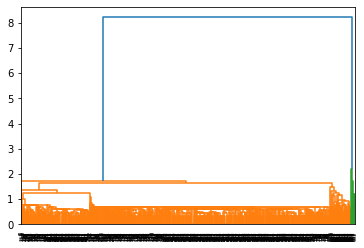

In [55]:
# Single linkage: 
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


mergings = linkage(X, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

In [56]:
features=data.columns

### Average Linkage:

In average linkage hierarchical clustering, the distance between two clusters is defined as the average distance between each point in one cluster to every point in the other cluster. For example, the distance between clusters “r” and “s” to the left is equal to the average length each arrow between connecting the points of one cluster to the other.

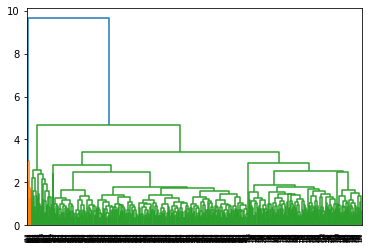

In [71]:
# Average linkage

mergings = linkage(X, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

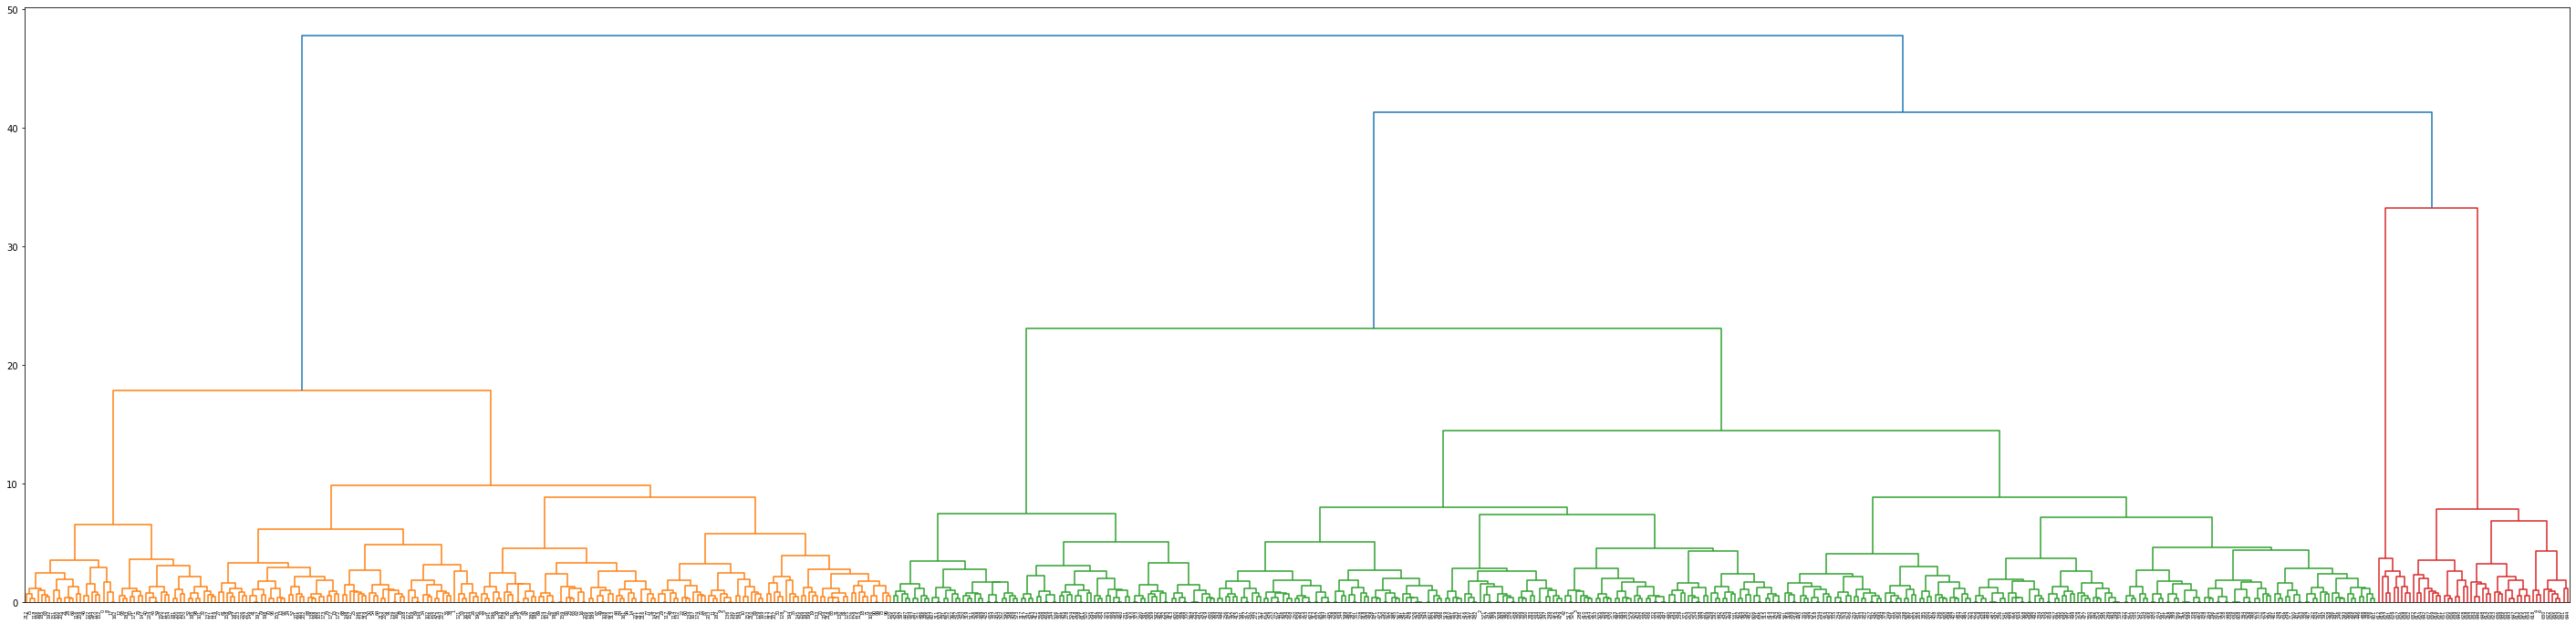

In [57]:
#plotting dendogram
plt.figure(figsize=(50, 12))
dend=hcluster.dendrogram(hcluster.linkage(X,method='ward'))

From above dendogram we can take minimum no of clusters as 2 and maximum number of cluster as 5.As we can see fro dendogram 2 in the the right no of clusters ,so we are going to take 2 no of clusters

In [62]:
# Getting labels from Agglomearative Hierarchical clustering
hcluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
hcluster.fit_predict(X)
hcluster_label = hcluster.labels_

In [63]:
hcluster_df = pd.DataFrame(data)
#adding hcluster labels in hcluster_df
hcluster_df['hcluster'] = hcluster_label
#first few rows of hcluster_df
hcluster_df.head()

Customer_Key  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0             5                 4                   2                  1   
1             1                 2                   3                  0   
2             0                 2                   7                  1   
3             2                 1                   5                  1   
4             2                 4                   6                  0   

   Total_visits_online  Total_calls_made  hcluster  
0                    1                 0         1  
1                   10                 9         1  
2                    3                 4         2  
3                    1                 4         2  
4                   12                 3         0

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


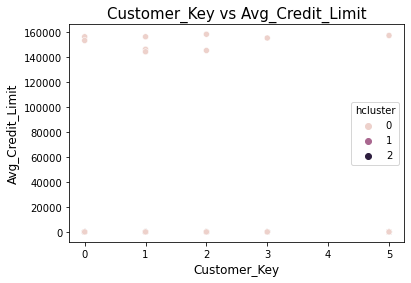

In [64]:
#visulazing hcluster results
#child mortality vs exports 
sns.scatterplot(hcluster_df['Customer_Key'],hcluster_df['Avg_Credit_Limit'],hue='hcluster',data=hcluster_df)
plt.title("Customer_Key vs Avg_Credit_Limit", fontsize=15)
plt.xlabel("Customer_Key", fontsize=12)
plt.ylabel("Avg_Credit_Limit", fontsize=12)
plt.show()

In [65]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    # intialise hclustering
    # Getting labels from Agglomearative Hierarchical clustering
    hcluster = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')  
    hcluster.fit_predict(X)
    hcluster_label = hcluster.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(X, hcluster_label)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.3412706984892907
For n_clusters=3, the silhouette score is 0.408969673316257
For n_clusters=4, the silhouette score is 0.43428758231083714
For n_clusters=5, the silhouette score is 0.36825653727846586
For n_clusters=6, the silhouette score is 0.34839952302987254
For n_clusters=7, the silhouette score is 0.29286006507021173
For n_clusters=8, the silhouette score is 0.25524696369596794


### Observations :
* From here ,y observations are for 4 clusters silhouette score is 0.43428
* Here one of my other observation is silhouette score for k-means is 0.45 but  in hierarchical clustering is 0.43
* After comparing both we can analyze that k-means clustering is performing well compare hierarchical clustering .

<AxesSubplot:xlabel='hcluster', ylabel='Total_calls_made'>

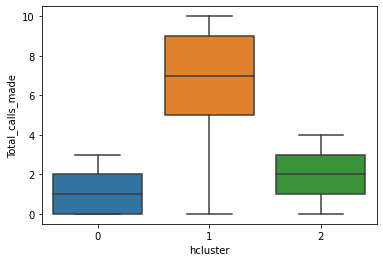

In [66]:
# Box plot to visualize Cluster Id vs Total_calls_made

sns.boxplot(x='hcluster', y='Total_calls_made', data=hcluster_df)

<AxesSubplot:xlabel='hcluster', ylabel='Total_visits_online'>

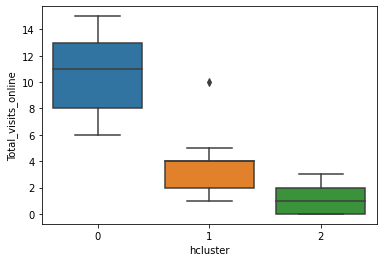

In [67]:
# Box plot to visualize Cluster Id vs Total_visits_online

sns.boxplot(x='hcluster', y='Total_visits_online', data=hcluster_df)

<AxesSubplot:xlabel='hcluster', ylabel='Total_Credit_Cards'>

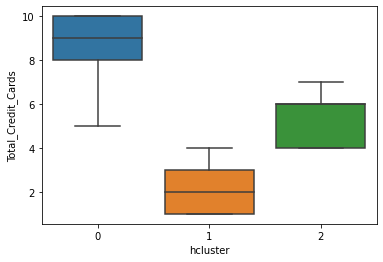

In [68]:
# Box plot to visualize Cluster Id vs Total_calls_made

sns.boxplot(x='hcluster', y='Total_Credit_Cards', data=hcluster_df)

<AxesSubplot:xlabel='hcluster', ylabel='Avg_Credit_Limit'>

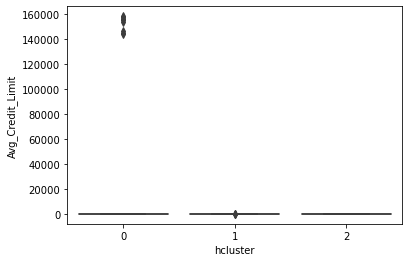

In [69]:
# Box plot to visualize Cluster Id vs Total_calls_made

sns.boxplot(x='hcluster', y='Avg_Credit_Limit', data=hcluster_df)

## Final Analysis
#### Inference:
K-Means Clustering with 3 Cluster Ids

* Customers with Cluster Id 1 are the customers with high amount of transactions as compared to other customers.
* Customers with Cluster Id 1 are frequent buyers.
* Customers with Cluster Id 2 are not recent buyers and hence least of importance from business point of view.
## Hierarchical Clustering with 3 Cluster Labels

* Customers with Cluster_Labels 2 are the customers with high amount of transactions as compared to other customers.
* Customers with Cluster_Labels 2 are frequent buyers.
* Customers with Cluster_Labels 0 are not recent buyers and hence least of importance from business point of view.

### Analysis of Cluster Forming

* It is quite interesting and intuitive to know how KMeans clustering algorithm actually works.

* KMeans clustering is an unsupervised clustering algorithm which groups together similar data in same cluster to form k clusters. As a result we get groups of similar records which can then be labelled and acted upon accordingly.

> How does the algorithm find the clusters?

* Given number of clusters k, it first selects k random point (may not be points in dataset) to be the k cluster centroids.
* Then we assign each point to the closest centroid and form k clusters.
* Once all points are assigned to a cluster, we then compute new centroids for each cluster.
* Then we reassign points to the closest centroid.

> If any reassignment takes place in step 4 we repeat steps 3 and 4. If no reassignment takes place then our model is ready and we have extracted k clusters from our dataset.

#### Elbow Curve to get the right number of Clusters
* A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.